In [1]:
import pandas as pd

#Loading the data
df = pd.read_csv('data/ReportSample.csv', low_memory=False)
df.head()

/var/folders/mk/87w2zpmj22l_fkqh6ryj49q40000gn/T/ipykernel_44852/2319757260.py:4: DtypeWarning: Columns (6,24,26,27,29,34,48,54,56,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ReportSample.csv')


,TID,ThreatID,IP,CIDR,ASN,ASNName,Hostname,ActivityDate,EventDate,DiscoverTime,...,socks5,socks4a,target,DateCreated,UserCreated,DateModified,UserModified,Priority,Signature,verified
0,3724954A-03DD-4EAF-824D-F933374D2EDE,794402,129.18.175.113,NaN,ASntpversion,Unverified,NaN,"Wed, 29 Jun 2022 0:00:00","Mon, 27 Jun 2022 8:34:56",NaN,...,NaN,NaN,NaN,"Wed, 29 Jun 2022 0:00:00",NaN,"Wed, 29 Jun 2022 0:00:00",dbo,NaN,NaN,NaN
1,0675AD47-AB54-4694-A32C-071BCFA65BEC,794403,41.184.42.225,NaN,ASntpversion,Unverified,NaN,"Wed, 29 Jun 2022 0:00:00","Mon, 27 Jun 2022 8:34:56",NaN,...,NaN,NaN,NaN,"Wed, 29 Jun 2022 0:00:00",NaN,"Wed, 29 Jun 2022 0:00:00",dbo,NaN,NaN,NaN
2,E384BCC5-795C-4FF6-A5BF-F063D605947A,794404,155.93.116.97,NaN,ASntpversion,Unverified,NaN,"Wed, 29 Jun 2022 0:00:00","Mon, 27 Jun 2022 8:34:56",NaN,...,NaN,NaN,NaN,"Wed, 29 Jun 2022 0:00:00",NaN,"Wed, 29 Jun 2022 0:00:00",dbo,NaN,NaN,NaN
3,88D0357D-EC23-4094-968C-1281FF5A0AFE,794407,154.120.115.161,NaN,ASntpversion,Unverified,NaN,"Wed, 29 Jun 2022 0:00:00","Mon, 27 Jun 2022 8:35:10",NaN,...,NaN,NaN,NaN,"Wed, 29 Jun 2022 0:00:00",NaN,"Wed, 29 Jun 2022 0:00:00",dbo,NaN,NaN,NaN
4,5CD572F3-2206-4F88-9504-BDAC1A8F0A79,794409,129.205.101.133,NaN,ASntpversion,Unverified,NaN,"Wed, 29 Jun 2022 0:00:00","Mon, 27 Jun 2022 8:35:12",NaN,...,NaN,NaN,NaN,"Wed, 29 Jun 2022 0:00:00",NaN,"Wed, 29 Jun 2022 0:00:00",dbo,NaN,NaN,NaN


In [2]:
df.isnull().sum()

TID                 0
ThreatID            0
IP                  0
CIDR            32230
ASN                 0
                ...  
DateModified        0
UserModified        0
Priority        32230
Signature       32230
verified        32230
Length: 79, dtype: int64

In [3]:
# Exploring by number of rows per treat type
df['Type'].value_counts()


Type
NTP                    10430
HTTP drone sinkhole     6866
SpamBot                  200
Microsoft Sinkhole       134
Name: count, dtype: int64

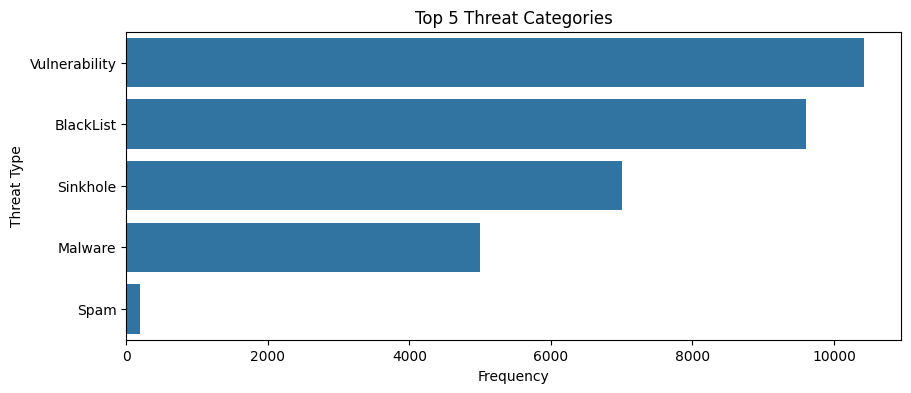

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Threats by Type
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index[:5])
plt.title("Top 5 Threat Categories")
plt.xlabel("Frequency")
plt.ylabel("Threat Type")
plt.show()


/var/folders/mk/87w2zpmj22l_fkqh6ryj49q40000gn/T/ipykernel_44852/3968950026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


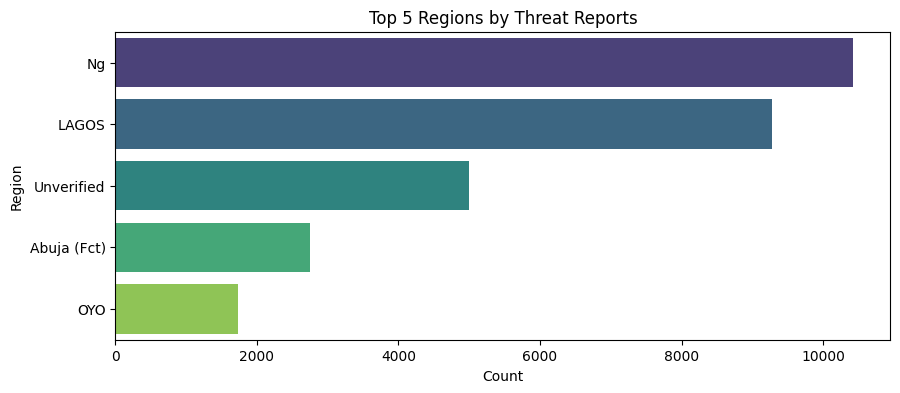

In [29]:
top_states = df['Region'].value_counts().head(5)

plt.figure(figsize=(10,4))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 5 Regions by Threat Reports")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

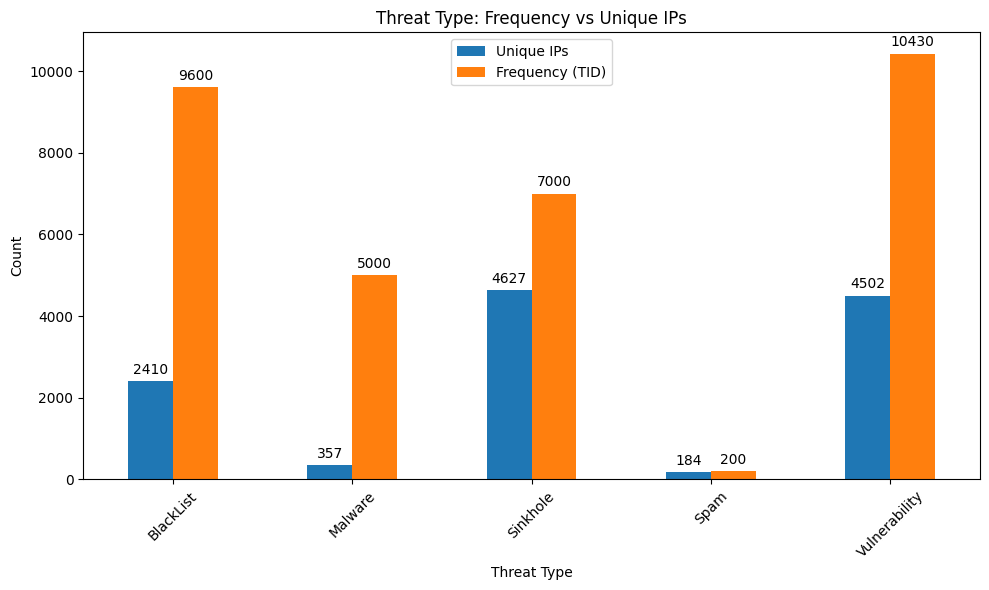

In [22]:
# Data preparation
unique_ips_per_type = df.groupby('Category')['IP'].nunique()
tid_count_per_type = df['Category'].value_counts()

plot_df = pd.DataFrame({
    'Unique IPs': unique_ips_per_type,
    'Frequency (TID)': tid_count_per_type
})

# Plot
ax = plot_df.plot(kind='bar', figsize=(10,6), title="Threat Type: Frequency vs Unique IPs")
plt.xlabel("Threat Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Adding value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)  # fmt='%.0f' shows integers, padding adds space

plt.show()

In [25]:

# Group by Region and count TID and unique IP
region_summary = df.groupby('Region').agg({
    'TID': 'count',
    'IP': pd.Series.nunique
}).reset_index()

# Rename columns for clarity
region_summary.columns = ['Region', 'Count of TID', 'Count of Unique IP']

# Add total row
total_row = pd.DataFrame({
    'Region': ['Total'],
    'Count of TID': [region_summary['Count of TID'].sum()],
    'Count of Unique IP': [region_summary['Count of Unique IP'].sum()]
})

# Concatenate the total row to the summary
final_table = pd.concat([region_summary, total_row], ignore_index=True)

# Display the result
final_table


,Region,Count of TID,Count of Unique IP
0,ADAMAWA,44,13
1,AKWA IBOM,36,10
2,Abia,113,28
3,Abuja (Fct),2753,1274
4,Anambra,45,14
5,BAYELSA,19,5
6,Benue,9,2
7,Borno,5,1
8,CROSS RIVER,31,7
9,Delta,38,12


In [26]:
# Exclude total row before sorting (optional but recommended)
region_only = final_table[final_table['Region'] != 'Total']

# Sort by Count of TID descending
region_sorted = region_only.sort_values(by='Count of TID', ascending=False)

# Add total row back
region_sorted = pd.concat([region_sorted, total_row], ignore_index=True)

region_sorted


,Region,Count of TID,Count of Unique IP
0,Ng,10430,4502
1,LAGOS,9281,3741
2,Unverified,5000,357
3,Abuja (Fct),2753,1274
4,OYO,1728,693
5,RIVERS,1684,895
6,EDO,299,125
7,IMO,136,64
8,Kaduna,136,80
9,ENUGU,136,46


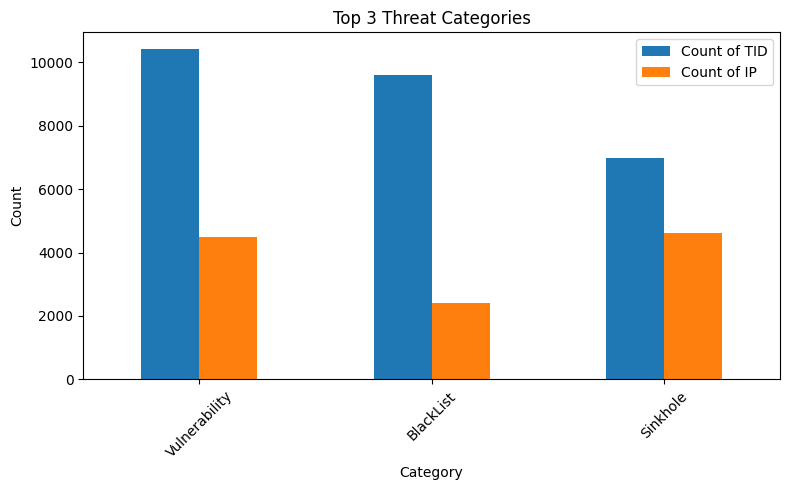

In [32]:
# Group by Type and get TID and Unique IP count
type_summary = df.groupby('Category').agg({
    'TID': 'count',
    'IP': pd.Series.nunique
}).rename(columns={'TID': 'Count of TID', 'IP': 'Count of IP'})

# Get top 3 by Count of TID
top3_types = type_summary.sort_values('Count of TID', ascending=False).head(3)

# Plot
top3_types.plot(kind='bar', figsize=(8,5))
plt.title("Top 3 Threat Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


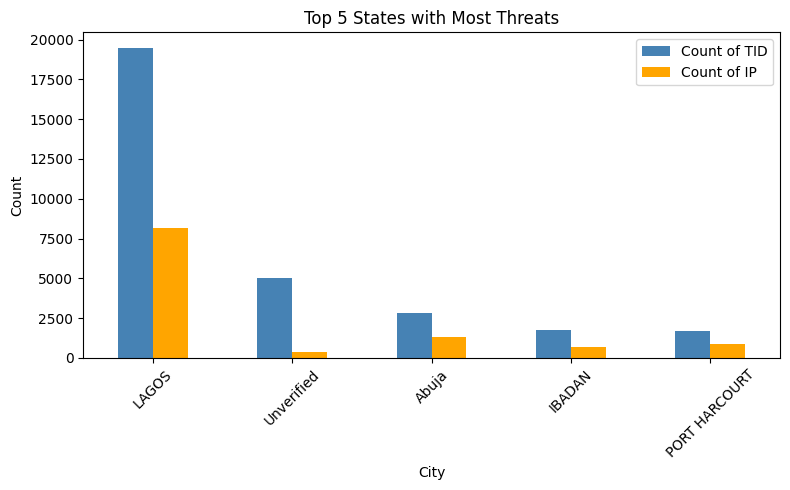

In [35]:
# Group by Region
region_summary = df.groupby('City').agg({
    'TID': 'count',
    'IP': pd.Series.nunique
}).rename(columns={'TID': 'Count of TID', 'IP': 'Count of IP'})

# Get Top 5
top5_states = region_summary.sort_values('Count of TID', ascending=False).head(5)

# Plot
top5_states.plot(kind='bar', figsize=(8,5), color=['steelblue', 'orange'])
plt.title("Top 5 States with Most Threats")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


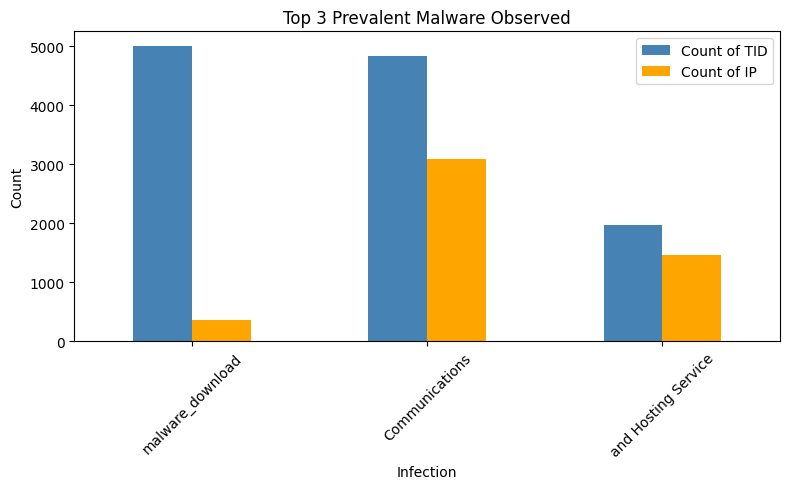

In [38]:
# Group by Infection
malware_summary = df.groupby('Infection').agg({
    'TID': 'count',
    'IP': pd.Series.nunique
}).rename(columns={'TID': 'Count of TID', 'IP': 'Count of IP'})

# Get top 3
top3_malware = malware_summary.sort_values('Count of TID', ascending=False).head(3)

# Plot
top3_malware.plot(kind='bar', figsize=(8,5), color=['steelblue', 'orange'])
plt.title("Top 3 Prevalent Malware Observed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

